<a href="https://colab.research.google.com/github/kjaron83/tensorflow-tutorials/blob/master/classification/intel_image_classification/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processing the [Intel natural scenes](https://www.kaggle.com/puneet6060/intel-image-classification) dataset.

In [1]:
# Are we using a GPU?
!nvidia-smi

Thu Mar 10 09:23:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Download zip file of images showing natural scenes around the world

# Train data
!wget https://archive.org/download/seg_train/seg_train.zip
# Test data
!wget https://archive.org/download/seg_test/seg_test.zip

--2022-03-10 14:14:48--  https://archive.org/download/seg_train/seg_train.zip
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia801409.us.archive.org/24/items/seg_train/seg_train.zip [following]
--2022-03-10 14:14:48--  https://ia801409.us.archive.org/24/items/seg_train/seg_train.zip
Resolving ia801409.us.archive.org (ia801409.us.archive.org)... 207.241.228.149
Connecting to ia801409.us.archive.org (ia801409.us.archive.org)|207.241.228.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209388413 (200M) [application/zip]
Saving to: ‘seg_train.zip’

seg_train.zip       100%[===================>] 199.69M  1.12MB/s    in 3m 25s  

2022-03-10 14:18:14 (995 KB/s) - ‘seg_train.zip’ saved [209388413/209388413]

--2022-03-10 14:18:14--  https://archive.org/download/seg_test/seg_test.zip
Resolving archive.org (archive.org)...

In [5]:
# Unzip the downloaded files
import zipfile

zip_ref = zipfile.ZipFile("/content/seg_train.zip", "r")
zip_ref.extractall()
zip_ref.close()

zip_ref = zipfile.ZipFile("/content/seg_test.zip", "r")
zip_ref.extractall()
zip_ref.close()

Let's see what's inside the seg_train folder.

In [6]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("seg_train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 6 directories and 0 images in 'seg_train'.
There are 0 directories and 2404 images in 'seg_train/glacier'.
There are 0 directories and 2512 images in 'seg_train/mountain'.
There are 0 directories and 2274 images in 'seg_train/sea'.
There are 0 directories and 2191 images in 'seg_train/buildings'.
There are 0 directories and 2382 images in 'seg_train/street'.
There are 0 directories and 2271 images in 'seg_train/forest'.


And how about insde the buildings directory?

In [8]:
!ls /content/seg_train/buildings

0.jpg	   12578.jpg  14916.jpg  17468.jpg  20017.jpg  4600.jpg  7382.jpg
10006.jpg  12590.jpg  14918.jpg  17479.jpg  20027.jpg  4620.jpg  7383.jpg
10014.jpg  125.jpg    14947.jpg  17480.jpg  2002.jpg   4621.jpg  739.jpg
10018.jpg  12602.jpg  14952.jpg  17491.jpg  20048.jpg  4623.jpg  7418.jpg
1001.jpg   12615.jpg  14958.jpg  17495.jpg  20054.jpg  4630.jpg  742.jpg
10029.jpg  12617.jpg  14968.jpg  17503.jpg  2038.jpg   4631.jpg  7439.jpg
10032.jpg  12629.jpg  14984.jpg  17516.jpg  2041.jpg   4634.jpg  7443.jpg
10056.jpg  12632.jpg  14991.jpg  1751.jpg   2043.jpg   463.jpg	 7455.jpg
1009.jpg   12636.jpg  1501.jpg	 17520.jpg  2059.jpg   4667.jpg  7463.jpg
10113.jpg  1263.jpg   15026.jpg  17537.jpg  2069.jpg   4686.jpg  7471.jpg
10126.jpg  12649.jpg  15030.jpg  17539.jpg  2076.jpg   4715.jpg  7478.jpg
1012.jpg   12659.jpg  1503.jpg	 1753.jpg   2083.jpg   4748.jpg  747.jpg
10144.jpg  12668.jpg  15042.jpg  17541.jpg  2088.jpg   4770.jpg  7491.jpg
10151.jpg  12669.jpg  15045.jpg  17545.jpg  20

In [9]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + "/" + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (150, 150, 3)


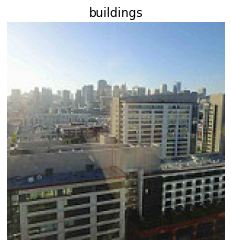

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir="/content/seg_train",
                        target_class="buildings")

In [12]:
# Setup the train and test directories
train_dir = "/content/seg_train"
test_dir = "/content/seg_test"

# Make sure we use the same image shape everywhere
TARGET_SIZE = (150, 150)
INPUT_SHAPE = TARGET_SIZE + (3,)

# Batch size for good health
BATCH_SIZE = 32

# Same random seed for repeatable results
RANDOM_SEED = 42

In [13]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [14]:
# We have 6 classes so this is a categorical classification problem
CLASS_MODE = "categorical"

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(RANDOM_SEED)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=BATCH_SIZE, # number of images to process at a time 
                                               target_size=TARGET_SIZE, # convert all images to the same size
                                               class_mode=CLASS_MODE, # type of problem we're working on
                                               seed=RANDOM_SEED)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=TARGET_SIZE,
                                               class_mode=CLASS_MODE,
                                               seed=RANDOM_SEED)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [16]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=INPUT_SHAPE), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(len(class_names), activation="softmax") # categorical activation output
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
439/439 [==============================] - 40s 68ms/step - loss: 0.9634 - accuracy: 0.6288 - val_loss: 0.7167 - val_accuracy: 0.7483
Epoch 2/5
439/439 [==============================] - 29s 65ms/step - loss: 0.6757 - accuracy: 0.7594 - val_loss: 0.6761 - val_accuracy: 0.7610
Epoch 3/5
439/439 [==============================] - 28s 64ms/step - loss: 0.5710 - accuracy: 0.7998 - val_loss: 0.6432 - val_accuracy: 0.7770
Epoch 4/5
439/439 [==============================] - 27s 62ms/step - loss: 0.5014 - accuracy: 0.8223 - val_loss: 0.6570 - val_accuracy: 0.7680
Epoch 5/5
439/439 [==============================] - 27s 62ms/step - loss: 0.4369 - accuracy: 0.8460 - val_loss: 0.6456 - val_accuracy: 0.7797


In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 10)        910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 10)       0         
 2D)                                                    

In [18]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

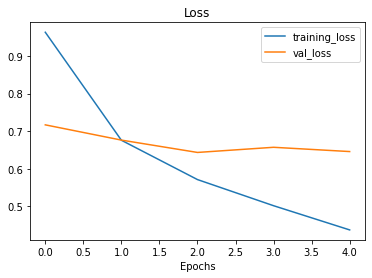

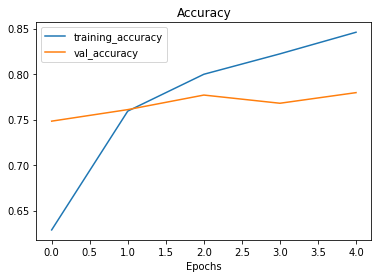

In [19]:
# Check out the loss curves of model_1
plot_loss_curves(history_1)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [20]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [21]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=TARGET_SIZE,
                                                                   batch_size=BATCH_SIZE,
                                                                   class_mode=CLASS_MODE,
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=TARGET_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode=CLASS_MODE,
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=TARGET_SIZE,
                                             batch_size=BATCH_SIZE,
                                             class_mode=CLASS_MODE)

Augmented training images:
Found 14034 images belonging to 6 classes.
Non-augmented training images:
Found 14034 images belonging to 6 classes.
Unchanged test images:
Found 3000 images belonging to 6 classes.


In [22]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

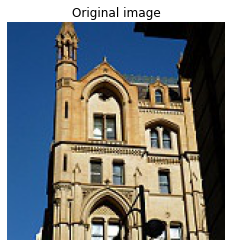

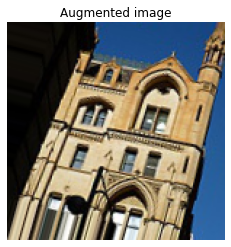

In [23]:
# Show original image and augmented image
random_number = random.randint(0, BATCH_SIZE) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Try to train the model with augmented images

In [24]:
# Set the seed
tf.random.set_seed(RANDOM_SEED)

# Clone the model (use the same architecture)
model_2 = tf.keras.models.clone_model(model_1)

# Compile the cloned model (same setup as used for model_1)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data_augmented, # use augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
439/439 [==============================] - 98s 222ms/step - loss: 1.5442 - accuracy: 0.3414 - val_loss: 1.2997 - val_accuracy: 0.4607
Epoch 2/5
439/439 [==============================] - 97s 220ms/step - loss: 1.1975 - accuracy: 0.5090 - val_loss: 0.9916 - val_accuracy: 0.5923
Epoch 3/5
439/439 [==============================] - 96s 219ms/step - loss: 1.1013 - accuracy: 0.5428 - val_loss: 0.9548 - val_accuracy: 0.6110
Epoch 4/5
439/439 [==============================] - 96s 220ms/step - loss: 1.0492 - accuracy: 0.5699 - val_loss: 0.8778 - val_accuracy: 0.6507
Epoch 5/5
439/439 [==============================] - 96s 218ms/step - loss: 1.0445 - accuracy: 0.5792 - val_loss: 0.9751 - val_accuracy: 0.5970


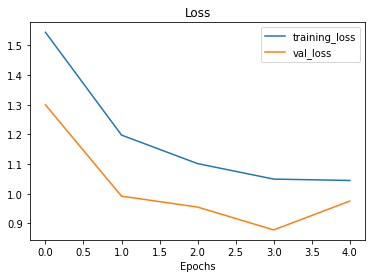

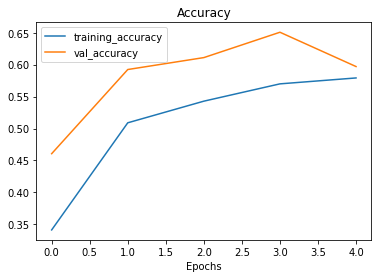

In [25]:
# Check out the loss curves of model_2
plot_loss_curves(history_2)

train_data_augmented is not shuffled, so it is hard to learn for the model. Lets try again.

In [26]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=TARGET_SIZE,
                                                                   batch_size=BATCH_SIZE,
                                                                   class_mode=CLASS_MODE) # This time shuffled.

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=TARGET_SIZE,
                                             batch_size=BATCH_SIZE,
                                             class_mode=CLASS_MODE) # This time shuffled.

Augmented training images:
Found 14034 images belonging to 6 classes.
Unchanged test images:
Found 3000 images belonging to 6 classes.


In [27]:
# Set the seed
tf.random.set_seed(RANDOM_SEED)

# Clone the model (use the same architecture)
model_3 = tf.keras.models.clone_model(model_1)

# Compile the cloned model (same setup as used for model_1)
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data_augmented, # use augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
439/439 [==============================] - 98s 221ms/step - loss: 1.1243 - accuracy: 0.5625 - val_loss: 0.9037 - val_accuracy: 0.6487
Epoch 2/5
439/439 [==============================] - 95s 217ms/step - loss: 0.9132 - accuracy: 0.6541 - val_loss: 0.7162 - val_accuracy: 0.7410
Epoch 3/5
439/439 [==============================] - 97s 222ms/step - loss: 0.8560 - accuracy: 0.6820 - val_loss: 0.7791 - val_accuracy: 0.7307
Epoch 4/5
439/439 [==============================] - 96s 219ms/step - loss: 0.8127 - accuracy: 0.7010 - val_loss: 0.6864 - val_accuracy: 0.7590
Epoch 5/5
439/439 [==============================] - 95s 217ms/step - loss: 0.7804 - accuracy: 0.7086 - val_loss: 0.6243 - val_accuracy: 0.7907


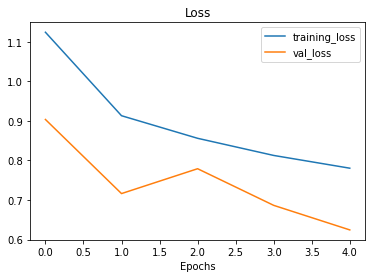

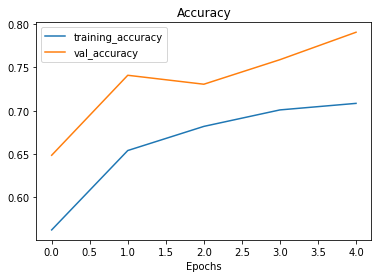

In [28]:
# Check out the loss curves of model_3
plot_loss_curves(history_3)

In [29]:
# Compare model_1 and model_3 results
model_1.evaluate(test_data)

94/94 [==============================] - 4s 45ms/step - loss: 0.6456 - accuracy: 0.7797


[0.6456038355827332, 0.7796666622161865]

In [30]:
model_3.evaluate(test_data)

94/94 [==============================] - 4s 45ms/step - loss: 0.6243 - accuracy: 0.7907


[0.6242976188659668, 0.7906666398048401]

It looks like, the model_3's accuracy is almost the same as model_1's. On the other hand the loss curves are different. Maybe more epochs will result better performance.

In [31]:
# Set the seed
tf.random.set_seed(RANDOM_SEED)

# Clone the model (use the same architecture)
model_4 = tf.keras.models.clone_model(model_1)

# Compile the cloned model (same setup as used for model_1)
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data_augmented,
                        epochs=10, # this time we use more epochs
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
439/439 [==============================] - 96s 217ms/step - loss: 1.1090 - accuracy: 0.5685 - val_loss: 0.8115 - val_accuracy: 0.7103
Epoch 2/10
439/439 [==============================] - 95s 216ms/step - loss: 0.9214 - accuracy: 0.6524 - val_loss: 0.8248 - val_accuracy: 0.6910
Epoch 3/10
439/439 [==============================] - 95s 215ms/step - loss: 0.8447 - accuracy: 0.6864 - val_loss: 0.6586 - val_accuracy: 0.7750
Epoch 4/10
439/439 [==============================] - 95s 216ms/step - loss: 0.8039 - accuracy: 0.7106 - val_loss: 0.6680 - val_accuracy: 0.7673
Epoch 5/10
439/439 [==============================] - 95s 215ms/step - loss: 0.7622 - accuracy: 0.7196 - val_loss: 0.7373 - val_accuracy: 0.7540
Epoch 6/10
439/439 [==============================] - 95s 215ms/step - loss: 0.7439 - accuracy: 0.7309 - val_loss: 0.7779 - val_accuracy: 0.7210
Epoch 7/10
439/439 [==============================] - 94s 215ms/step - loss: 0.7269 - accuracy: 0.7404 - val_loss: 0.6521 - val_ac

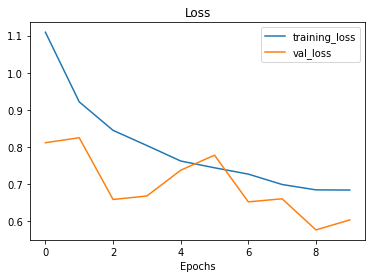

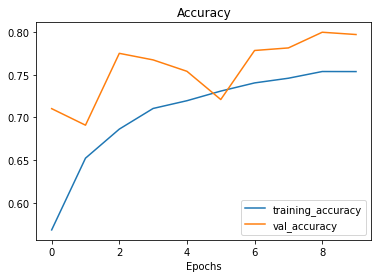

In [32]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

Lets create a biger model with more layers. Using 5 epochs as with the model_1.

In [33]:
import tensorflow as tf

model_5 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3,
                         activation="relu", 
                         input_shape=INPUT_SHAPE),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  # New convolutional layers
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(len(class_names), activation="softmax") # categorical activation output
])

# Compile the model
model_5.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
439/439 [==============================] - 96s 216ms/step - loss: 1.1952 - accuracy: 0.5220 - val_loss: 1.0108 - val_accuracy: 0.5923
Epoch 2/5
439/439 [==============================] - 94s 215ms/step - loss: 1.0139 - accuracy: 0.6040 - val_loss: 0.8471 - val_accuracy: 0.6750
Epoch 3/5
439/439 [==============================] - 94s 214ms/step - loss: 0.9304 - accuracy: 0.6401 - val_loss: 0.8327 - val_accuracy: 0.6920
Epoch 4/5
439/439 [==============================] - 94s 214ms/step - loss: 0.8747 - accuracy: 0.6665 - val_loss: 0.6934 - val_accuracy: 0.7547
Epoch 5/5
439/439 [==============================] - 94s 214ms/step - loss: 0.8312 - accuracy: 0.6856 - val_loss: 0.7518 - val_accuracy: 0.7200


In [34]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 146, 146, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 73, 73, 10)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 10)        910       
                                                                 
 conv2d_7 (Conv2D)           (None, 69, 69, 10)        910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 34, 34, 10)       0         
 2D)                                                  

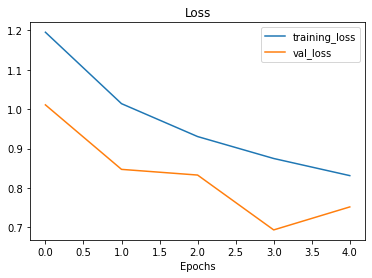

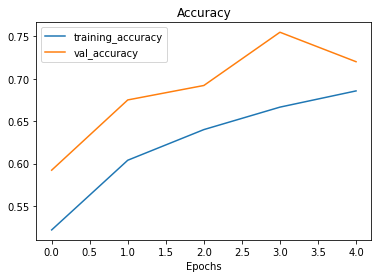

In [35]:
# Check out the loss curves of model_5
plot_loss_curves(history_5)

In [36]:
model_5.evaluate(test_data)

94/94 [==============================] - 4s 45ms/step - loss: 0.7518 - accuracy: 0.7200


[0.7518051862716675, 0.7200000286102295]

Although model_1 and model_3 have higher accuracy, the loss curves show permanent declining instead of overfitting.

In [37]:
model_5.save("/content/drive/MyDrive/Colab Notebooks/intel_image_classification/model_5")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/intel_image_classification/model_5/assets


In [38]:
import tensorflow as tf

# Load in a model and evaluate it
model_5 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/intel_image_classification/model_5")

model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 146, 146, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 73, 73, 10)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 10)        910       
                                                                 
 conv2d_7 (Conv2D)           (None, 69, 69, 10)        910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 34, 34, 10)       0         
 2D)                                                  

Let's make some predictions.

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

pred_dir = "/content/seg_test"

pred_datagen = ImageDataGenerator(rescale=1./255)

print("Images for prediction:")
pred_data = pred_datagen.flow_from_directory(pred_dir,
                                             target_size=TARGET_SIZE,
                                             batch_size=BATCH_SIZE,
                                             class_mode=CLASS_MODE,
                                             shuffle=False)
y_true = pred_data.classes

#Confution Matrix and Classification Report
Y_pred = model_5.predict(pred_data)
y_pred = np.argmax(Y_pred, axis=1)

Images for prediction:
Found 3000 images belonging to 6 classes.


In [40]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm

array([[338,   8,   4,   7,   0,  80],
       [  8, 419,   0,   2,   0,  45],
       [ 40,   5, 379,  87,  14,  28],
       [ 37,   5,  73, 379,  25,   6],
       [ 65,   5,  91, 109, 219,  21],
       [ 60,  10,   0,   4,   1, 426]])

Let's see the confusion matrix of the predictions.

[Text(0, 0.5, 'buildings'),
 Text(0, 1.5, 'forest'),
 Text(0, 2.5, 'glacier'),
 Text(0, 3.5, 'mountain'),
 Text(0, 4.5, 'sea'),
 Text(0, 5.5, 'street')]

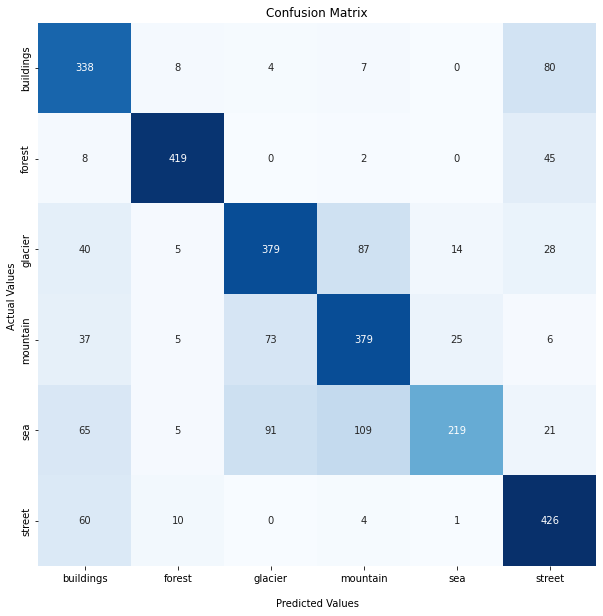

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

import seaborn as sns
ax = sns.heatmap(cm,cbar=False,annot=True,cmap=plt.cm.Blues,fmt='.4g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)